# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [3]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=3)

In [4]:
model_lr.fit(data_train, target_train)
model_dt.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the
flipper length of the training dataset. Get the predictions of each model
using this test dataset.

In [17]:
# Write your code here.
import numpy as np
data_test = np.arange(data_train.values.min(), data_train.values.max())

In [20]:
data_test = data_test.reshape(-1,1)

In [21]:
pred_lr = model_lr.predict(data_test)

In [25]:
pred_dt = model_dt.predict(data_test)

In [26]:
pred_lr

array([2765.08606377, 2814.77163018, 2864.45719658, 2914.14276299,
       2963.8283294 , 3013.5138958 , 3063.19946221, 3112.88502861,
       3162.57059502, 3212.25616143, 3261.94172783, 3311.62729424,
       3361.31286065, 3410.99842705, 3460.68399346, 3510.36955986,
       3560.05512627, 3609.74069268, 3659.42625908, 3709.11182549,
       3758.79739189, 3808.4829583 , 3858.16852471, 3907.85409111,
       3957.53965752, 4007.22522392, 4056.91079033, 4106.59635674,
       4156.28192314, 4205.96748955, 4255.65305596, 4305.33862236,
       4355.02418877, 4404.70975517, 4454.39532158, 4504.08088799,
       4553.76645439, 4603.4520208 , 4653.1375872 , 4702.82315361,
       4752.50872002, 4802.19428642, 4851.87985283, 4901.56541923,
       4951.25098564, 5000.93655205, 5050.62211845, 5100.30768486,
       5149.99325126, 5199.67881767, 5249.36438408, 5299.04995048,
       5348.73551689, 5398.4210833 , 5448.1066497 , 5497.79221611,
       5547.47778251, 5597.16334892, 5646.84891533])

In [27]:
pred_dt

array([3469.80519481, 3469.80519481, 3469.80519481, 3469.80519481,
       3469.80519481, 3469.80519481, 3469.80519481, 3469.80519481,
       3469.80519481, 3469.80519481, 3469.80519481, 3469.80519481,
       3469.80519481, 3469.80519481, 3469.80519481, 3469.80519481,
       3469.80519481, 3469.80519481, 3668.85964912, 3668.85964912,
       3668.85964912, 3668.85964912, 3895.35714286, 3895.35714286,
       3895.35714286, 3895.35714286, 3895.35714286, 3895.35714286,
       3895.35714286, 3895.35714286, 3895.35714286, 4316.66666667,
       4316.66666667, 4316.66666667, 4316.66666667, 4486.29032258,
       4486.29032258, 4486.29032258, 4486.29032258, 4486.29032258,
       4933.88888889, 4933.88888889, 4933.88888889, 4933.88888889,
       4933.88888889, 4933.88888889, 5216.66666667, 5216.66666667,
       5216.66666667, 5547.85714286, 5547.85714286, 5547.85714286,
       5547.85714286, 5547.85714286, 5547.85714286, 5547.85714286,
       5547.85714286, 5547.85714286, 5547.85714286])

Create a scatter plot containing the training samples and superimpose the
predictions of both model on the top.

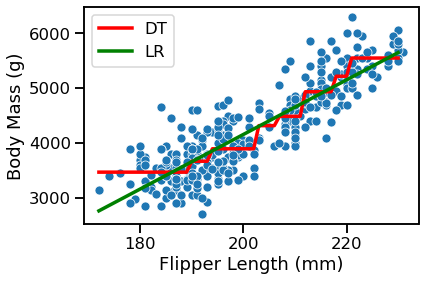

In [35]:
# Write your code here.
import seaborn as sns

ax = sns.scatterplot(data=penguins, x=data_columns[0], y=target_column)
ax.plot(data_test, pred_dt, label='DT', color='Red')
ax.plot(data_test, pred_lr, label='LR', color='Green')
ax.legend()

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing the value of your previous dataset. Besides, add values
below and above the minimum and the maximum of the flipper length seen
during training.

In [37]:
# Write your code here.
data_test = np.arange(data_train.values.min()-10, data_train.values.max()+10).reshape(-1,1)

Finally, make predictions with both model on this new testing set. Repeat
the plotting of the previous exercise.

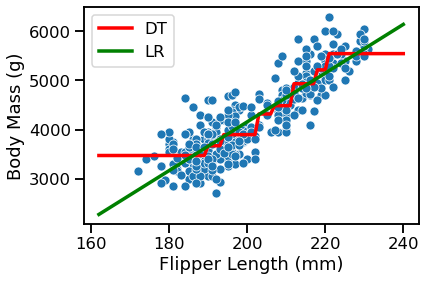

In [39]:
# Write your code here.
pred_dt = model_dt.predict(data_test)
pred_lr = model_lr.predict(data_test)


ax = sns.scatterplot(data=penguins, x=data_columns[0], y=target_column)
ax.plot(data_test, pred_dt, label='DT', color='Red')
ax.plot(data_test, pred_lr, label='LR', color='Green')
ax.legend()